# Assignment 3: Clustering Algorithm Self-Study

Apply DBSCAN, k-Means, and Hierarchical Clustering to at least two different datasets and
present results using clearly labeled plots:
- Dataset where DBSCAN excels (e.g., non-spherical clusters, datasets with noise).
- Dataset where DBSCAN struggles (e.g., varying densities, difficulty tuning eps).


## Import packages

In [202]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_moons, make_blobs, make_circles
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering



## Functions

In [203]:
# Create functions to print the results
def DBSCAN_results(rad, num_samples):
    db = DBSCAN(eps=rad, min_samples=num_samples).fit(X)
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print("")
    print(f"eps: {rad}, min_samples: {num_samples}")
    print(f"Estimated number of clusters: {n_clusters_}")
    print(f"Estimated number of noise points:{n_noise_}")
    score = silhouette_score(X, labels)
    print(f"Silhouette Score: {score:.2f}")


def kmeans_result (nclusters):
    kmeans = KMeans(n_clusters=nclusters, max_iter=100, random_state=47)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
  

    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', alpha =0.85)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='red', marker='X', label='Centroids')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Clustering Result')
    plt.show

    silhouette_avg = silhouette_score(X, y_kmeans)
    print(f"Silhouette Score: {silhouette_avg}")
    

def hier_clustering (nclusters):
    agg_clustering = AgglomerativeClustering(n_clusters=nclusters)
    y_agg = agg_clustering.fit_predict(X)
    
    plt.scatter(X[:, 0], X[:, 1], c=y_agg, cmap='viridis', alpha=0.85)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Agglomerative Clustering Results")
    plt.colorbar(label="Cluster Labels")
    plt.show()

## Dataset: make_blobs() 
Use make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5])
→ Shows DBSCAN struggles with varying densities.

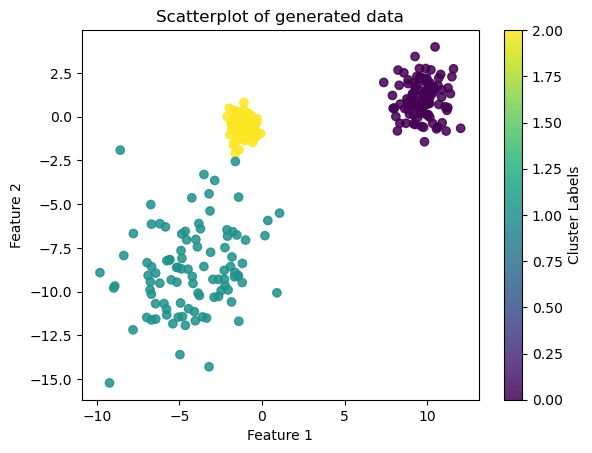

In [204]:
# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=45)
# scatter plot of the data generated
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.85)
plt.colorbar(label="Cluster Labels")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"Scatterplot of generated data")
plt.show()

#### DBSCAN Results

In [205]:
DBSCAN_results(0.5, 10)
DBSCAN_results(0.3, 10)
DBSCAN_results(1, 10)
DBSCAN_results(0.2, 10) 
DBSCAN_results(0.4, 10)
DBSCAN_results(0.4, 15)



eps: 0.5, min_samples: 10
Estimated number of clusters: 3
Estimated number of noise points:142
Silhouette Score: 0.26

eps: 0.3, min_samples: 10
Estimated number of clusters: 1
Estimated number of noise points:225
Silhouette Score: 0.15

eps: 1, min_samples: 10
Estimated number of clusters: 4
Estimated number of noise points:70
Silhouette Score: 0.55

eps: 0.2, min_samples: 10
Estimated number of clusters: 1
Estimated number of noise points:264
Silhouette Score: -0.09

eps: 0.4, min_samples: 10
Estimated number of clusters: 2
Estimated number of noise points:189
Silhouette Score: 0.05

eps: 0.4, min_samples: 15
Estimated number of clusters: 1
Estimated number of noise points:214
Silhouette Score: 0.21


#### KMeans Result

Silhouette Score: 0.7585935687148282


c:\Users\Iris_\OneDrive\Desktop\Course Files\Machine Learning\Labs & Assignments\.pixi\envs\default\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


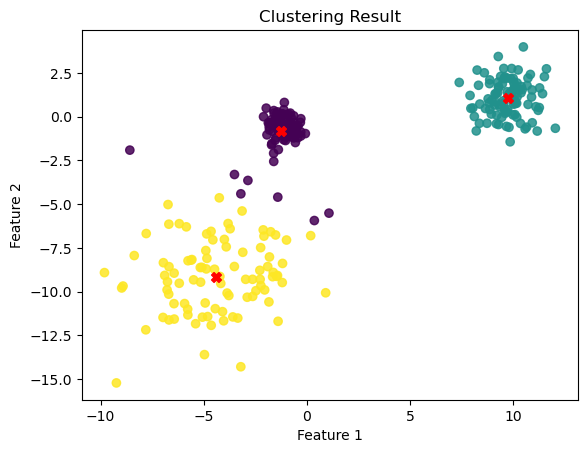

In [206]:
kmeans_result(3)

Silhouette Score: 0.680941611860316


c:\Users\Iris_\OneDrive\Desktop\Course Files\Machine Learning\Labs & Assignments\.pixi\envs\default\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


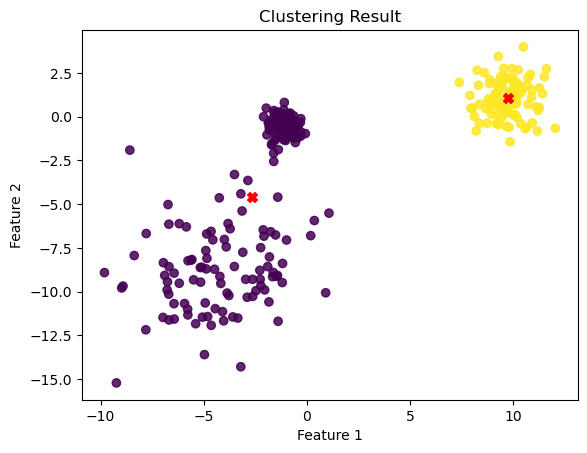

In [207]:
kmeans_result(2)

#### Hierarchical Clustering

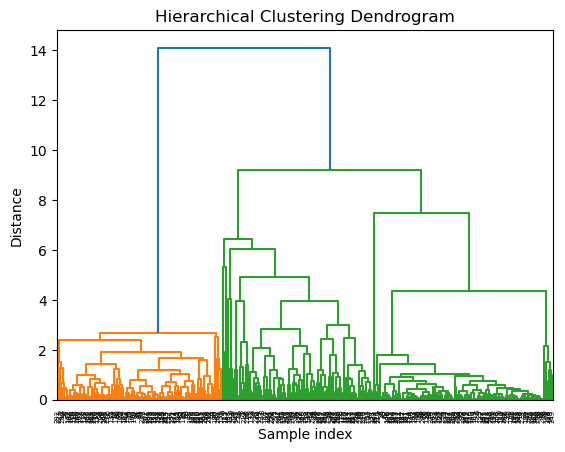

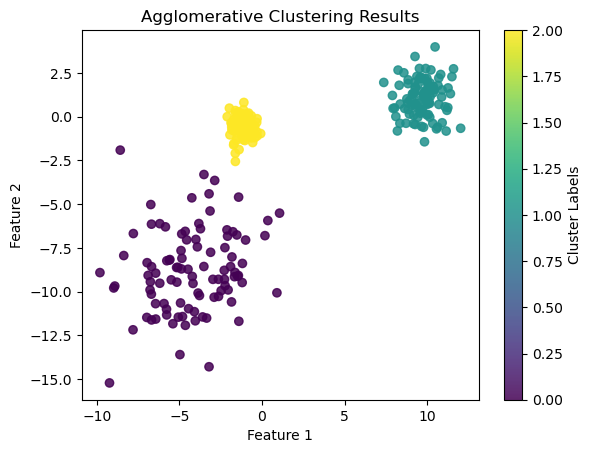

In [208]:
Z = linkage(X, 'average')
plt.figure()
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

hier_clustering(3)

## Dataset: make_moon()  
→ Highlights DBSCAN's ability to handle non-linearly separable data.


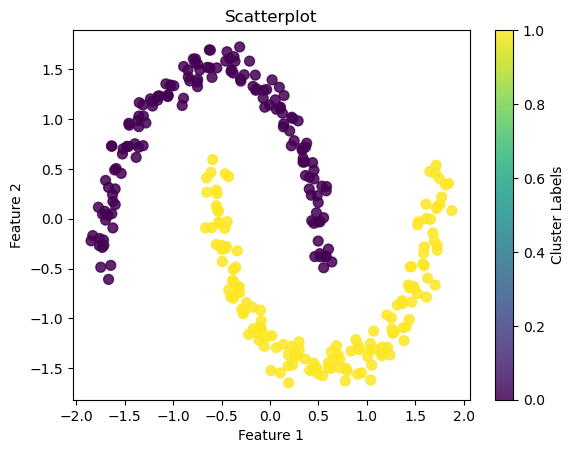

In [209]:
# Generate moon-shaped dataset
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)
X = StandardScaler().fit_transform(X)
# Scatterplot of generated data 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, alpha=0.85)
plt.title("Scatterplot")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster Labels")
plt.show()


#### DBSCAN

In [210]:
DBSCAN_results(0.2, 5)
DBSCAN_results(0.3, 5) 
DBSCAN_results(0.3, 20)



eps: 0.2, min_samples: 5
Estimated number of clusters: 2
Estimated number of noise points:2
Silhouette Score: 0.24

eps: 0.3, min_samples: 5
Estimated number of clusters: 2
Estimated number of noise points:0
Silhouette Score: 0.39

eps: 0.3, min_samples: 20
Estimated number of clusters: 2
Estimated number of noise points:143
Silhouette Score: 0.28


#### KMeans

Silhouette Score: 0.4953633920108147


c:\Users\Iris_\OneDrive\Desktop\Course Files\Machine Learning\Labs & Assignments\.pixi\envs\default\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


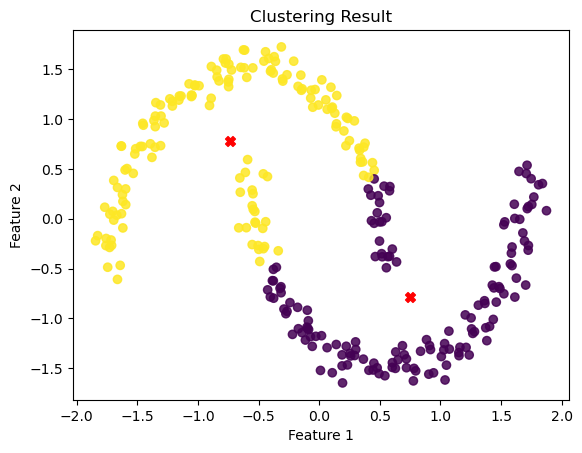

In [211]:
kmeans_result(2)

#### Hierarchical Clustering

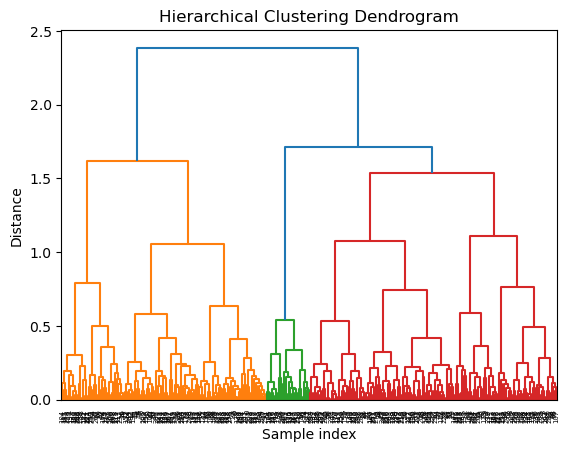

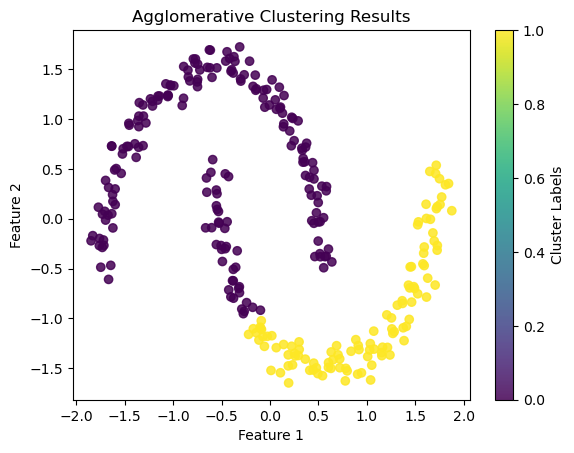

In [212]:
Z = linkage(X, 'average')
plt.figure()
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

hier_clustering(2)

